# Boston Predict

- Boston 집값을 예측해보려 한다
- 변수가 13개인데 각각의 가중치를 구해 수식을 찾아본다.

In [6]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
# data 불러오기
path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv'
boston = pd.read_csv(path)

boston.columns
independent = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
dependent = boston[['medv']]

print(independent.shape, dependent.shape)

(506, 13) (506, 1)


In [8]:
# Model 준비
X = tf.keras.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.Model(X, Y)
model.compile(loss='mse')

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(independent, dependent, epochs=1000)

Epoch 1/1000


16/16 [==============================] - 0s 973us/step - loss: 155896.6406
Epoch 2/1000
16/16 [==============================] - 0s 837us/step - loss: 142651.6875
Epoch 3/1000
16/16 [==============================] - 0s 854us/step - loss: 131734.0625
Epoch 4/1000
16/16 [==============================] - 0s 776us/step - loss: 121499.3516
Epoch 5/1000
16/16 [==============================] - 0s 750us/step - loss: 111626.3281
Epoch 6/1000
16/16 [==============================] - 0s 797us/step - loss: 102228.2969
Epoch 7/1000
16/16 [==============================] - 0s 851us/step - loss: 93238.2500
Epoch 8/1000
16/16 [==============================] - 0s 716us/step - loss: 84664.0156
Epoch 9/1000
16/16 [==============================] - 0s 971us/step - loss: 76528.5547
Epoch 10/1000
16/16 [==============================] - 0s 983us/step - loss: 68840.1094
Epoch 11/1000
16/16 [==============================] - 0s 960us/step - loss: 61510.0586
Epoch 12/1000
16/16 [===========================

In [10]:
model.predict(independent[:5])

1/1 [==============================] - 0s 131ms/step


array([[29.364336],
       [24.76574 ],
       [30.419884],
       [29.710566],
       [29.102598]], dtype=float32)

In [11]:
dependent[:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


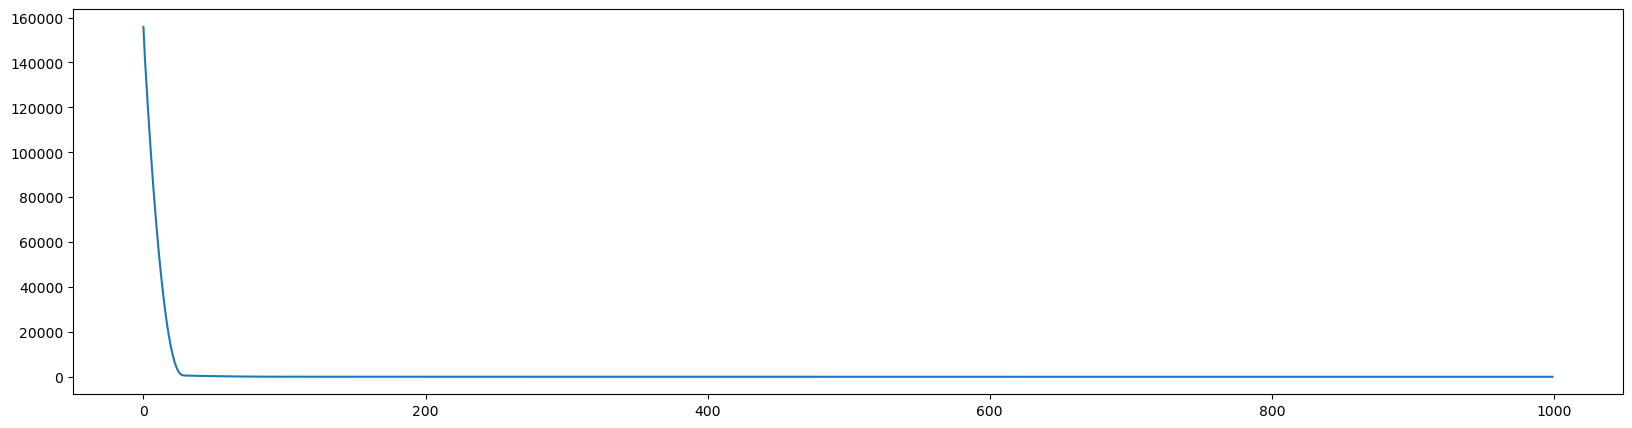

In [12]:
# loss값 시각화
loss = history.history['loss']

plt.figure(figsize=(20, 5))
plt.plot(loss, label='loss')
plt.show()

In [26]:
w, b = model.get_weights()
w = w.round(2)
print(w, b)

[[-0.09]
 [ 0.07]
 [-0.05]
 [ 3.25]
 [ 2.05]
 [ 4.01]
 [ 0.02]
 [-0.82]
 [ 0.15]
 [-0.01]
 [-0.02]
 [ 0.02]
 [-0.58]] [2.429219]


#### 수식 출력해보기

In [30]:
variables = boston.columns[:-1]
weights = [f"{e[0]} * {v}"for e, v in zip(w, variables)]
print("y = ", end='')
print(*weights, sep=' + \n')
print("+ {}".format(*b))

y = -0.09000000357627869 * crim + 
0.07000000029802322 * zn + 
-0.05000000074505806 * indus + 
3.25 * chas + 
2.049999952316284 * nox + 
4.010000228881836 * rm + 
0.019999999552965164 * age + 
-0.8199999928474426 * dis + 
0.15000000596046448 * rad + 
-0.009999999776482582 * tax + 
-0.019999999552965164 * ptratio + 
0.019999999552965164 * b + 
-0.5799999833106995 * lstat
+ 2.4292190074920654


#### Perceptron
<div style="text-align:center;">
    <img src = "https://github.com/Ha-coding-user/aivle_study/blob/main/DL/image/Boston%20Predict1.png?raw=true">
</div>

- 위 그림에서 $ w_1, w_2, ..., w_n $을 가중치 $ b $를 편향이라 부름
- 종속변수가 여러 개 일땐 각각의 가중치가 생김
    즉, $ y_1, y_2 $가 있고 독립변수가 12개라면 모든 변수의 개수는 **가중치 : 24개, 편향 : 2개** 가 생긴다